In [1]:
# Appeding the path to the scaman package
import sys
sys.path.append('/Users/berke/Codes/scaman-2024/scaman') 
# flann path
sys.path.append('/Users/berke/Codes/python/flann/src/python')
import numpy as np

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split


# Load indianpines data
X = np.load('/Users/berke/Codes/scaman-2024/tests/data/indianpinearray.npy')
y = np.load('/Users/berke/Codes/scaman-2024/tests/data/IPgt.npy')


In [3]:
#reshape the data

X = np.reshape(X,(-1,X.shape[-1]))
y = np.reshape(y,(-1,))
print(X.shape)
print(y.shape)

(21025, 200)
(21025,)


In [4]:
# Step 2: Center data matrix
import numpy as np
means = np.mean(X, axis=0)
X_centered = X - means
# Step 3: Verify that covariance matrix is centered
assert np.allclose(np.mean(X_centered, axis=0), np.zeros_like(means))

In [5]:
# Step 4: Compute covariance matrix
cov = np.cov(X, rowvar=False)
eigs = np.linalg.eig(cov)[0]
eigs_sorted = np.flip(np.sort(eigs))
variances = np.cumsum(eigs_sorted)/np.sum(eigs_sorted)
tv = 0.8
actual_dim = np.argmax(np.array(variances)>tv)

In [6]:
from serial.le_flann import LE
from utils.intrinsic_dimension_estimator import Estimator
import time

In [7]:
# Step 5: Create Estimator instance
estimator = Estimator(X_centered, p=10, nk=8, epsilon=0.1, delta=0.1, tv = 0.8)

start_time_est = time.time()
estDim, estVar, estDimF = estimator.estimator()
end_time_est = time.time()

print(f"Actual Dim = {actual_dim}, Estimated Dim = {estDim}, Estimated Var = {estVar}, Estimated Final Dim = {estDimF}")
print(f"Time taken: {end_time_est - start_time_est} seconds")

Actual Dim = 1, Estimated Dim = 1, Estimated Var = 1.6947209846526243, Estimated Final Dim = 3
Time taken: 57.146331787109375 seconds


In [63]:
estDim=10

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
## Created test with estimated dimension and PCA
start_time_est_le = time.time()
le = LE(X_scaled,n_components=estDim,solver='scipy',slepc_solver='ARNOLDI',affinity='numpy')
embedding_le = le.fit_transform()
end_time_est_le = time.time()
#embedding shape
print(embedding_le.shape)
#embedding type
print(type(embedding_le))
print(f"Time taken: {end_time_est_le - start_time_est_le} seconds")
# convert complex matrix to real matrix
#embedding_le = np.real(embedding_le)

KeyboardInterrupt: 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embedding_le, y, test_size=0.3, random_state=42)

# Fit the KNN model on the training data
start_time_est_knn = time.time()
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
end_time_est_knn = time.time()

# Use the trained model to predict the labels for the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of LE applied data with estDim: {accuracy}")
print(f"Time taken: {end_time_est_knn - start_time_est_knn} seconds")

Accuracy of LE applied data with estDim: 0.6471147748890298
Time taken: 0.01786494255065918 seconds


In [12]:
time_taken_intrinsic = (end_time_est - start_time_est) + (end_time_est_le - start_time_est_le) + (end_time_est_knn - start_time_est_knn)
print(f"Total time taken: {time_taken_intrinsic} seconds")

Total time taken: 315.3801167011261 seconds


In [61]:
# Split the data into training and testing sets for original data
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(X, y, test_size=0.2, random_state=42)
start_time_org_knn = time.time()
# Fit the KNN model on the training data for original data
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_org, y_train_org)
end_time_org_knn = time.time()

# Use the trained model to predict the labels for the testing data for original data
y_pred_org = knn.predict(X_test_org)

# Calculate the accuracy of the model for original data
accuracy_org = accuracy_score(y_test_org, y_pred_org)
print(f"Accuracy of original dataset: {accuracy_org}")
print(f"Time taken: {end_time_org_knn - start_time_org_knn} seconds")

Accuracy of original dataset: 0.7234244946492271
Time taken: 0.0012018680572509766 seconds


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(embedding_le, y, test_size=0.3, random_state=42)

# Fit the KNN model on the training data
start_time_est_knn = time.time()
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
end_time_est_knn = time.time()

# Use the trained model to predict the labels for the testing data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of LE applied data with estDim: {accuracy}")
print(f"Time taken: {end_time_est_knn - start_time_est_knn} seconds")

Accuracy of LE applied data with estDim: 0.6399809765377299
Time taken: 0.006610870361328125 seconds


In [34]:
import time

# Initialize an empty list to store the accuracies and times
accuracies = []
times = []

# Define the range of dimensions
dimensions = range(2, 50, 2)

# Perform PCA with the current dimension
le = LE(X_scaled,n_components=100,solver='scipy',slepc_solver='ARNOLDI',affinity='numpy')
embedding_le = le.fit_transform()

# Loop through each dimension
for dim in dimensions:
    start_time = time.time()
    
    embedding_le = embedding_le[:,:dim]
    #embedding_le = np.real(embedding_le)
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(embedding_le, y, test_size=0.2, random_state=42)
    
    # Fit the KNN model on the training data
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train, y_train)
    
    # Use the trained model to predict the labels for the testing data
    y_pred = knn.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy to the list
    accuracies.append(accuracy)
    
    end_time = time.time()
    times.append(end_time - start_time)

# Print the accuracies and times for each dimension
for dim, accuracy, time_taken in zip(dimensions, accuracies, times):
    print(f"Dimension: {dim}, Accuracy: {accuracy}, Time taken: {time_taken} seconds")

print(accuracies)
print(times)

Computing affinity matrix with numpy and sklearn: 100%|██████████| 21025/21025 [00:01<00:00, 10938.28it/s]


Dimension: 2, Accuracy: 0.6040428061831153, Time taken: 411.73869013786316 seconds
Dimension: 4, Accuracy: 0.6473246135552914, Time taken: 334.4897618293762 seconds
Dimension: 6, Accuracy: 0.6461355529131986, Time taken: 317.6478478908539 seconds
Dimension: 8, Accuracy: 0.6487514863258026, Time taken: 265.72340393066406 seconds
Dimension: 10, Accuracy: 0.6447086801426872, Time taken: 238.21302604675293 seconds
Dimension: 12, Accuracy: 0.6518430439952437, Time taken: 199.5501651763916 seconds
Dimension: 14, Accuracy: 0.648513674197384, Time taken: 188.5514039993286 seconds
Dimension: 16, Accuracy: 0.6563614744351962, Time taken: 164.01092910766602 seconds
Dimension: 18, Accuracy: 0.6549346016646849, Time taken: 165.03207206726074 seconds
[0.6040428061831153, 0.6473246135552914, 0.6461355529131986, 0.6487514863258026, 0.6447086801426872, 0.6518430439952437, 0.648513674197384, 0.6563614744351962, 0.6549346016646849]
[411.73869013786316, 334.4897618293762, 317.6478478908539, 265.7234039306

In [36]:
time_taken_loop = np.sum(times)
print(f"Total time taken: {np.sum(times)} seconds")

Total time taken: 2284.957300186157 seconds


In [45]:
print(accuracies)

[0.6040428061831153, 0.6473246135552914, 0.6461355529131986, 0.6487514863258026, 0.6447086801426872, 0.6518430439952437, 0.648513674197384, 0.6563614744351962, 0.6549346016646849, 0.6549346016646849, 0.6549346016646849]


In [56]:
# Create lists of dimensions and accuracies
dimensions = list(range(2, 20, 2))

In [57]:
dimensions.append(estDim)
#accuracies.append(accuracy)
#drop the appeneded dimension accuracy




In [50]:
dimensions.pop()
accuracies.pop()

0.6549346016646849

In [55]:
length = len(dimensions)
print(length)
length_acc = len(accuracies)
print(length_acc)

9
10


/var/folders/yj/rxsr79ls6fx9ykhgjv_fbk2r0000gp/T/ipykernel_32200/3613014485.py:7: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "bo-" (-> linestyle='-'). The keyword argument will take precedence.
  plt.plot(dimensions, accuracies, 'bo-', linestyle='dotted', label='LE Dimensions')
/var/folders/yj/rxsr79ls6fx9ykhgjv_fbk2r0000gp/T/ipykernel_32200/3613014485.py:37: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


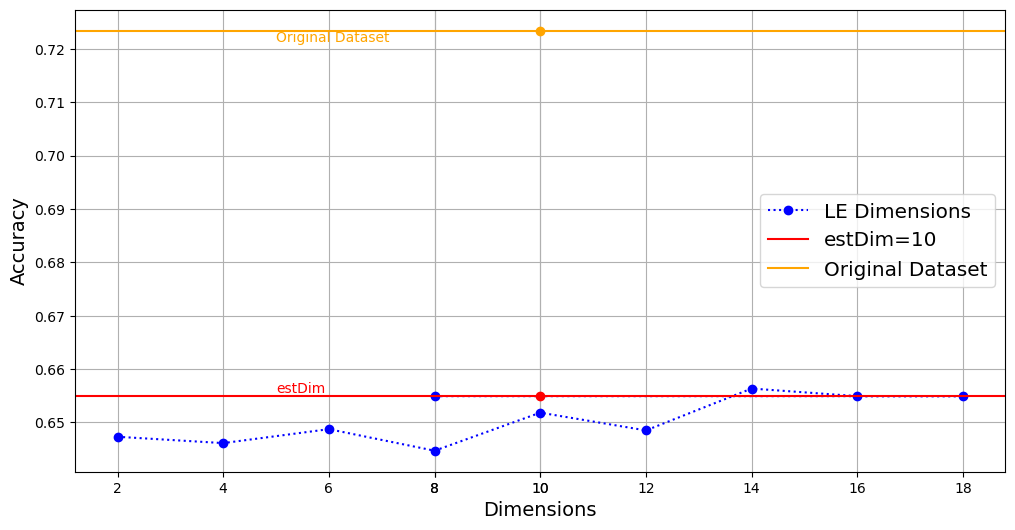

In [65]:
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(12, 6))  # Width: 18 inches, Height: 6 inches

# Create a blue dotted line plot of dimensions vs accuracies with markers
plt.plot(dimensions, accuracies, 'bo-', linestyle='dotted', label='LE Dimensions')

# Highlight the accuracy of estDim with a straight red line
plt.axhline(y=accuracy, color='red', linestyle='-', label=f'estDim={estDim}')
plt.text(5, accuracy, 'estDim', verticalalignment='bottom', color='red')

# Plot the accuracy of the original data with a straight orange line
plt.axhline(y=accuracy_org, color='orange', linestyle='-', label='Original Dataset')
plt.text(5, accuracy_org, 'Original Dataset', verticalalignment='top', color='orange')

# Highlight the intersection point at estimated dimension
# Plot these after the blue line to ensure they appear on top
plt.scatter(estDim, accuracy, color='red', zorder=5)
plt.scatter(estDim, accuracy_org, color='orange', zorder=5)

# Add grid
plt.grid(True)

# Set x-axis to show all dimensions
plt.xticks(dimensions + [estDim])

# Label the axes and create a legend
plt.xlabel('Dimensions', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
#plt.title('Indian Pines - PCA and kNN Accuracies with Dimension Estimator', fontsize=16)

# Create a legend with larger font size
legend = plt.legend(fontsize='x-large')

# Increase the size of the legend markers
for handle in legend.legendHandles:
    handle._sizes = [85]

plt.show()

In [66]:
# compare the time taken for intrinsic dimension and loop
print(f"Total time taken for intrinsic dimension: {time_taken_intrinsic} seconds")
print(f"Total time taken for loop: {time_taken_loop} seconds")

# compare the accuracy of intrinsic dimension and loop
print(f"Accuracy of LE applied data with estDim: {accuracy}")
print(f"Accuracy of original dataset: {accuracy_org}")
print(f'Average accuracy of LE applied data with loop: {np.mean(accuracies)}')
print


Total time taken for intrinsic dimension: 315.3801167011261 seconds
Total time taken for loop: 2284.957300186157 seconds
Accuracy of LE applied data with estDim: 0.6549346016646849
Accuracy of original dataset: 0.7234244946492271
Average accuracy of LE applied data with loop: 0.6508442330558859


<function print>